In [3]:
#TASK 1: IMPLEMENTATION OF FUNCTIONS
import numpy as np
import math

# 1.1 Image Resizing (Interpolation Methods)
def resize_image(image, new_width, new_height, method="linear"):
    original_height, original_width = image.shape
    resized_image = np.zeros((new_height, new_width))

    for y in range(new_height):
        for x in range(new_width):
            # Map (x, y) in the resized image back to original image coordinates
            original_x = x * original_width / new_width
            original_y = y * original_height / new_height

            if method == "linear":
                resized_image[y, x] = linear_interpolation(image, original_x, original_y)
            elif method == "nearest":
                resized_image[y, x] = nearest_neighbor_interpolation(image, original_x, original_y)
            elif method == "polynomial":
                resized_image[y, x] = polynomial_interpolation(image, original_x, original_y)

    return resized_image

def linear_interpolation(image, x, y):
    x1, y1 = int(x), int(y)
    x2, y2 = min(x1 + 1, image.shape[1] - 1), min(y1 + 1, image.shape[0] - 1)

    a = x - x1
    b = y - y1

    value = (1 - a) * (1 - b) * image[y1, x1] + a * (1 - b) * image[y1, x2] \
            + (1 - a) * b * image[y2, x1] + a * b * image[y2, x2]
    return value

def nearest_neighbor_interpolation(image, x, y):
    x_nearest = round(x)
    y_nearest = round(y)
    return image[y_nearest, x_nearest]

def polynomial_interpolation(image, x, y):
    # A simple implementation of cubic interpolation along x and y axes
    def cubic_interpolate(p, x):
        return (
            p[1]
            + 0.5 * x * (p[2] - p[0]
            + x * (2.0 * p[0] - 5.0 * p[1] + 4.0 * p[2] - p[3]
            + x * (3.0 * (p[1] - p[2]) + p[3] - p[0])))
        )

    x_int = int(x)
    y_int = int(y)
    x_frac = x - x_int
    y_frac = y - y_int

    x_indices = [max(min(x_int + i, image.shape[1] - 1), 0) for i in range(-1, 3)]
    y_indices = [max(min(y_int + i, image.shape[0] - 1), 0) for i in range(-1, 3)]

    values = []
    for i in range(4):
        p = [image[y_indices[j], x_indices[i]] for j in range(4)]
        values.append(cubic_interpolate(p, y_frac))

    return cubic_interpolate(values, x_frac)

# 1.2 Image Blurring (Box, Gaussian, Adaptive)
def box_blur(image, kernel_size):
    blurred_image = np.zeros_like(image)
    k = kernel_size // 2
    for y in range(k, image.shape[0] - k):
        for x in range(k, image.shape[1] - k):
            blurred_image[y, x] = np.mean(image[y - k:y + k + 1, x - k:x + k + 1])
    return blurred_image

def gaussian_blur(image, kernel_size, sigma):
    def gaussian(x, y):
        return (1 / (2 * math.pi * sigma**2)) * math.exp(-(x**2 + y**2) / (2 * sigma**2))

    k = kernel_size // 2
    kernel = np.zeros((kernel_size, kernel_size))
    for i in range(-k, k + 1):
        for j in range(-k, k + 1):
            kernel[i + k, j + k] = gaussian(i, j)

    kernel /= np.sum(kernel)
    blurred_image = np.zeros_like(image)

    for y in range(k, image.shape[0] - k):
        for x in range(k, image.shape[1] - k):
            blurred_image[y, x] = np.sum(image[y - k:y + k + 1, x - k:x + k + 1] * kernel)

    return blurred_image

def adaptive_blur(image, kernel_size):
    blurred_image = np.zeros_like(image)
    k = kernel_size // 2
    for y in range(k, image.shape[0] - k):
        for x in range(k, image.shape[1] - k):
            region = image[y - k:y + k + 1, x - k:x + k + 1]
            mean = np.mean(region)
            std_dev = np.std(region)
            if std_dev > 0:
                blurred_image[y, x] = mean
            else:
                blurred_image[y, x] = image[y, x]
    return blurred_image


Original Image:


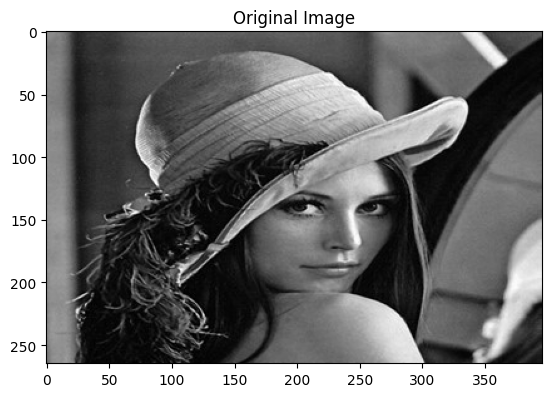

Resized Image (Linear):


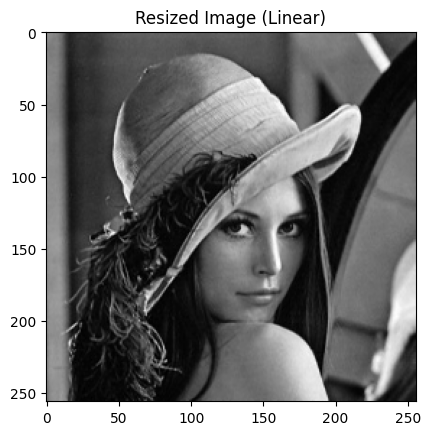

Box Blurred Image:


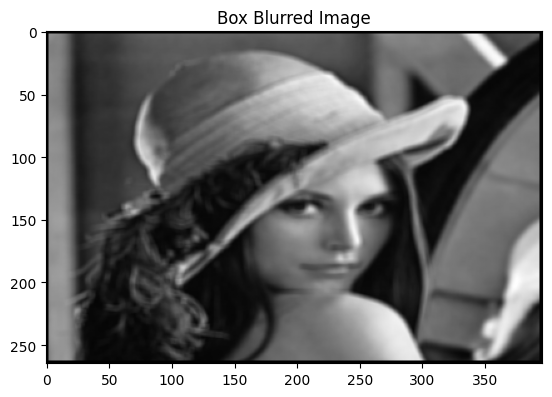

Gaussian Blurred Image:


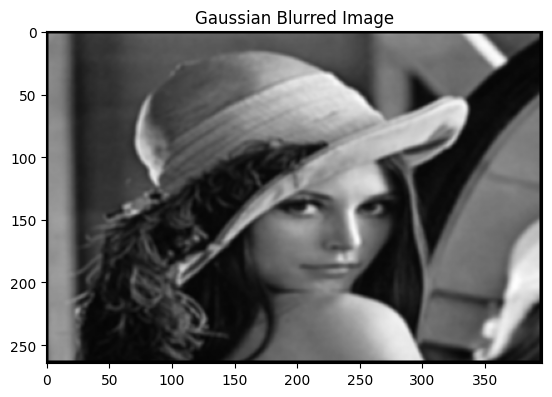

Adaptive Blurred Image:


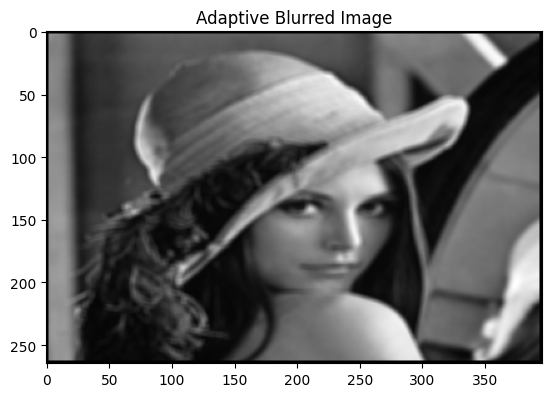

In [2]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Load and convert lena.jpg to grayscale
def load_image(filepath):
    image = Image.open(filepath).convert("L")  # Convert to grayscale
    return np.array(image, dtype=np.float32)

# Save the processed image
def save_image(array, filepath):
    image = Image.fromarray(array.astype(np.uint8))
    image.save(filepath)

# Example usage with lena.jpg
if __name__ == "__main__":
    # Load lena.jpg
    image = load_image("/content/Picture1.jpg")

    print("Original Image:")
    plt.imshow(image, cmap="gray")
    plt.title("Original Image")
    plt.show()

    # Resizing
    resized = resize_image(image, 256, 256, method="linear")
    print("Resized Image (Linear):")
    plt.imshow(resized, cmap="gray")
    plt.title("Resized Image (Linear)")
    plt.show()

    # Box Blur
    blurred = box_blur(image, 5)
    print("Box Blurred Image:")
    plt.imshow(blurred, cmap="gray")
    plt.title("Box Blurred Image")
    plt.show()

    # Gaussian Blur
    gaussian_blurred = gaussian_blur(image, 5, sigma=1.5)
    print("Gaussian Blurred Image:")
    plt.imshow(gaussian_blurred, cmap="gray")
    plt.title("Gaussian Blurred Image")
    plt.show()

    # Adaptive Blur
    adaptive_blurred = adaptive_blur(image, 5)
    print("Adaptive Blurred Image:")
    plt.imshow(adaptive_blurred, cmap="gray")
    plt.title("Adaptive Blurred Image")
    plt.show()

    # Save the output images
    save_image(resized, "resized_lena.jpg")
    save_image(blurred, "box_blurred_lena.jpg")
    save_image(gaussian_blurred, "gaussian_blurred_lena.jpg")
    save_image(adaptive_blurred, "adaptive_blurred_lena.jpg")


Model: Naive Bayes
Accuracy: 0.85
Recall: 0.85
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        33
           1       0.83      0.86      0.84        28
           2       0.91      0.61      0.73        33
           3       0.91      0.85      0.88        34
           4       0.97      0.83      0.89        46
           5       0.90      0.94      0.92        47
           6       0.92      0.97      0.94        35
           7       0.69      0.97      0.80        34
           8       0.57      0.87      0.68        30
           9       0.96      0.65      0.78        40

    accuracy                           0.85       360
   macro avg       0.86      0.85      0.84       360
weighted avg       0.88      0.85      0.85       360

Confusion Matrix:
[[31  0  0  0  0  1  0  1  0  0]
 [ 0 24  0  0  0  0  0  0  3  1]
 [ 0  2 20  0  0  0  1  0 10  0]
 [ 0  0  1 29  0  1  0  0  3  0]
 [ 0  0  0  0 38  0  

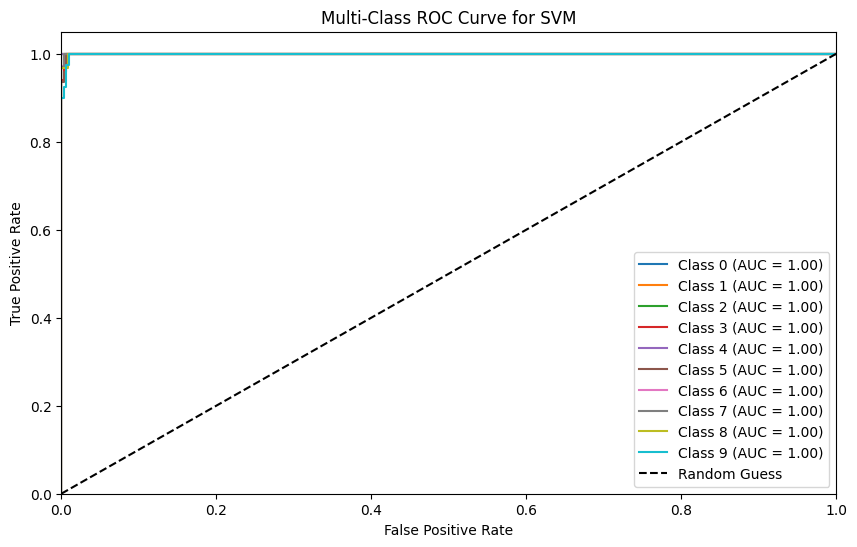

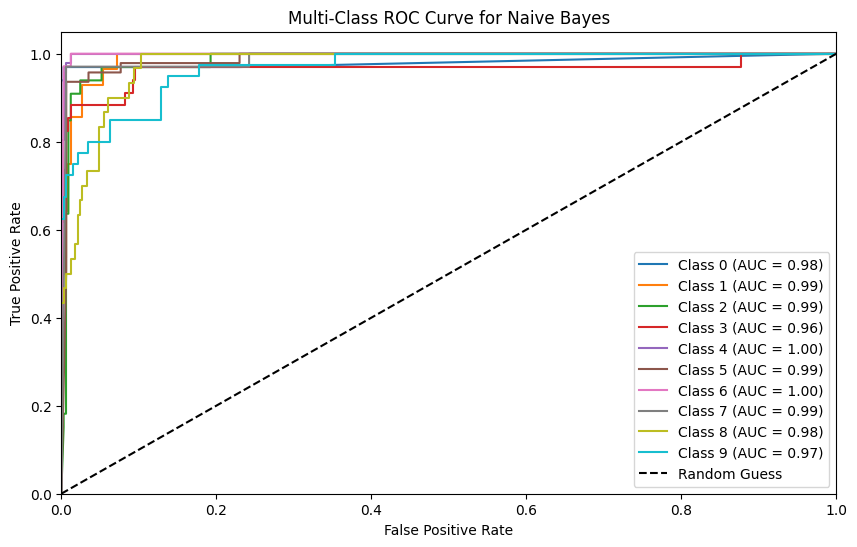

In [2]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    roc_auc_score,
    roc_curve,
    recall_score,
)
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Load dataset
digits = load_digits()
X, y = digits.data, digits.target

# One-hot encode labels for multi-class evaluation
y_binarized = label_binarize(y, classes=np.unique(y))
n_classes = y_binarized.shape[1]

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to train and evaluate models
def train_and_evaluate_model(model, model_name, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred, average="weighted")
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Recall: {recall:.2f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    return y_pred

# Naive Bayes
nb_model = GaussianNB()
y_pred_nb = train_and_evaluate_model(nb_model, "Naive Bayes", X_train, X_test, y_train, y_test)

# SVM
svm_model = SVC(probability=True, kernel="linear")
y_pred_svm = train_and_evaluate_model(svm_model, "SVM", X_train, X_test, y_train, y_test)

# Multi-class ROC Curve for SVM
y_test_binarized = label_binarize(y_test, classes=np.unique(y))
y_prob_svm = svm_model.predict_proba(X_test)

fpr, tpr, roc_auc = {}, {}, {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_prob_svm[:, i])
    roc_auc[i] = roc_auc_score(y_test_binarized[:, i], y_prob_svm[:, i])

# Plotting ROC Curves
plt.figure(figsize=(10, 6))
colors = plt.cm.tab10(np.linspace(0, 1, n_classes))

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], label=f"Class {i} (AUC = {roc_auc[i]:.2f})", color=color)

plt.plot([0, 1], [0, 1], "k--", label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multi-Class ROC Curve for SVM")
plt.legend(loc="lower right")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.show()

y_prob_nb = nb_model.predict_proba(X_test)

fpr_nb, tpr_nb, roc_auc_nb = {}, {}, {}
for i in range(n_classes):
    fpr_nb[i], tpr_nb[i], _ = roc_curve(y_test_binarized[:, i], y_prob_nb[:, i])
    roc_auc_nb[i] = roc_auc_score(y_test_binarized[:, i], y_prob_nb[:, i])

# Plotting ROC Curves for Naive Bayes
plt.figure(figsize=(10, 6))
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr_nb[i], tpr_nb[i], label=f"Class {i} (AUC = {roc_auc_nb[i]:.2f})", color=color)

plt.plot([0, 1], [0, 1], "k--", label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multi-Class ROC Curve for Naive Bayes")
plt.legend(loc="lower right")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.show()
